In [1]:
#https://www.dummies.com/programming/python/plotting-a-sound-file-in-ipython/
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.fftpack import fft
import numpy as np
from gurobipy import *
from IPython.display import Audio

In [ ]:
# Read WAV File
wav_file = 'audiofile/G53-40100-1111-235.wav'
rate, data = wav.read(wav_file)
file_length_in_seconds = len(data)/rate

wav_file1= 'audiofile/1-E1-Major 07.wav'
rate1, data1 = wav.read(wav_file1)
file_length_in_seconds1 = len(data1)/rate1

%matplotlib inline
plt.figure(figsize=(20,5))
plt.plot(data)
plt.title('wav_file')
#plt.show() #not needed if %matplotlib inline is already initialized
plt.figure(figsize=(20,5))
plt.plot(data1)
plt.title('wav_file1')

In [ ]:
Audio(wav_file)

In [ ]:
Audio(wav_file1)

## FFT

In [2]:
# Function for transforming a signal with fourier
def fourier_trans(data, rate, begin_time, end_time): 
    # initialising variables
    tp_count = len(data)
    values = np.arange(int(tp_count/2))
    time_period = tp_count/rate
    frequencies = values/time_period
    
    #at what intervals time points are sampled
    sampling_interval = 1/rate;
    
    #time points
    time = np.arange(begin_time, end_time, sampling_interval);
    
    #Frequency domain representation
    fourier_transform = fft(data)/tp_count #normalized the amplitude
    fourier_transform = fourier_transform[range(int(len(data)/2))] #exclude sampling frequency
    
    return frequencies, abs(fourier_transform)

In [ ]:
freq, fourier = fourier_trans(data, rate, 0, file_length_in_seconds)

In [ ]:
freq1, fourier1 = fourier_trans(data1, rate1, 0, file_length_in_seconds1)

In [3]:
# Frequency domain representation
def plot_freq_domain(freq, fourier,name):
    plt.figure(figsize=(20,5))
    plt.plot(freq, fourier)
    plt.xlabel('Frequency in Hz')
    plt.ylabel('Amplitude')
    plt.xlim(0, 1300)
    plt.title(name)
    plt.show()

In [ ]:
plot_freq_domain(freq,fourier, wav_file)

In [ ]:
plot_freq_domain(freq1,fourier1, wav_file1)

In [ ]:
ampl_const = 200
fourier_list = list(fourier)
ampl_peaks = list(filter(lambda i: i > 200, fourier_list))
ampl_peaks

In [ ]:
for x in range(len(ampl_peaks)):
    index = fourier_list.index(ampl_peaks[x])
    print('Frequenz bei Index {0}: {1}Hz mit einer Amplitude von: {2:0.2f}dB'
          .format(index, freq[index], ampl_peaks[x]))

# Chord Approximation


In [24]:
# Read wav-Files
rate_40, data_40 = wav.read('audiofile/G53-40100-1111-00001.wav')
rate_41, data_41 = wav.read('audiofile/G53-41101-1111-00002.wav')
rate_42, data_42 = wav.read('audiofile/G53-42102-1111-00003.wav')
rate_43, data_43 = wav.read('audiofile/G53-43103-1111-00004.wav')
 
rate_45, data_45 = wav.read('audiofile/G53-45200-1111-00014.wav')
rate_46, data_46 = wav.read('audiofile/G53-46201-1111-00015.wav')
rate_47, data_47 = wav.read('audiofile/G53-47202-1111-00016.wav')
rate_48, data_48 = wav.read('audiofile/G53-48203-1111-00017.wav')
 
rate_50, data_50 = wav.read('audiofile/G53-50300-1111-00027.wav')
rate_51, data_51 = wav.read('audiofile/G53-51301-1111-00028.wav')
rate_52, data_52 = wav.read('audiofile/G53-52302-1111-00029.wav')
rate_53, data_53 = wav.read('audiofile/G53-53303-1111-00030.wav')
 
rate_55, data_55 = wav.read('audiofile/G53-55400-1111-00040.wav')
rate_56, data_56 = wav.read('audiofile/G53-56401-1111-00041.wav')
rate_57, data_57 = wav.read('audiofile/G53-57402-1111-00042.wav')
rate_58, data_58 = wav.read('audiofile/G53-58403-1111-00043.wav')
 
rate_59, data_59 = wav.read('audiofile/G53-59500-1111-00053.wav')
rate_60, data_60 = wav.read('audiofile/G53-60501-1111-00054.wav')
rate_61, data_61 = wav.read('audiofile/G53-61502-1111-00055.wav')
rate_62, data_62 = wav.read('audiofile/G53-62503-1111-00056.wav')
 
rate_64, data_64 = wav.read('audiofile/G53-64600-1111-00066.wav')
rate_65, data_65 = wav.read('audiofile/G53-65601-1111-00067.wav')
rate_66, data_66 = wav.read('audiofile/G53-66602-1111-00068.wav')
rate_67, data_67 = wav.read('audiofile/G53-67603-1111-00069.wav')

# Chords
#rate_chord, data_chord = wav.read('audiofile/1-E1-Major 00.wav')
rate_chord, data_chord = wav.read('audiofile/1-E1-Major 01.wav')

# Singletone
#rate_chord, data_chord = wav.read('audiofile/G53-65601-1111-00067.wav')

# Singletone played on another guitar
#rate_chord, data_chord = wav.read('audiofile/G53-42102-1111-237.wav')



In [25]:
freq, mischsignal = fourier_trans(data_chord, rate_chord, 0, 2.5) 
 
# 1. Saite Bund 0 - 3
_, ton_40      = fourier_trans(data_40, rate_40, 0, 2.5)
_, ton_41      = fourier_trans(data_41, rate_41, 0, 2.5)
_, ton_42      = fourier_trans(data_42, rate_42, 0, 2.5)
_, ton_43      = fourier_trans(data_43, rate_43, 0, 2.5)
 
# 2. Saite Bund 0 - 3
_, ton_45      = fourier_trans(data_45, rate_45, 0, 2.5)
_, ton_46      = fourier_trans(data_46, rate_46, 0, 2.5)
_, ton_47      = fourier_trans(data_47, rate_47, 0, 2.5)
_, ton_48      = fourier_trans(data_48, rate_48, 0, 2.5)
 
# 3. Saite Bund 0 - 3
_, ton_50      = fourier_trans(data_50, rate_50, 0, 2.5)
_, ton_51      = fourier_trans(data_51, rate_51, 0, 2.5)
_, ton_52      = fourier_trans(data_52, rate_42, 0, 2.5)
_, ton_53      = fourier_trans(data_53, rate_43, 0, 2.5)
 
# 4. Saite Bund 0 - 3
_, ton_55      = fourier_trans(data_55, rate_55, 0, 2.5)
_, ton_56      = fourier_trans(data_56, rate_56, 0, 2.5)
_, ton_57      = fourier_trans(data_57, rate_57, 0, 2.5)
_, ton_58      = fourier_trans(data_58, rate_58, 0, 2.5)
 
# 5. Saite Bund 0 - 3
_, ton_59      = fourier_trans(data_59, rate_59, 0, 2.5)
_, ton_60      = fourier_trans(data_60, rate_60, 0, 2.5)
_, ton_61      = fourier_trans(data_61, rate_61, 0, 2.5)
_, ton_62      = fourier_trans(data_62, rate_62, 0, 2.5)
 
# 6. Saite Bund 0 - 3
_, ton_64      = fourier_trans(data_64, rate_64, 0, 2.5)
_, ton_65      = fourier_trans(data_65, rate_65, 0, 2.5)
_, ton_66      = fourier_trans(data_66, rate_66, 0, 2.5)
_, ton_67      = fourier_trans(data_67, rate_67, 0, 2.5)


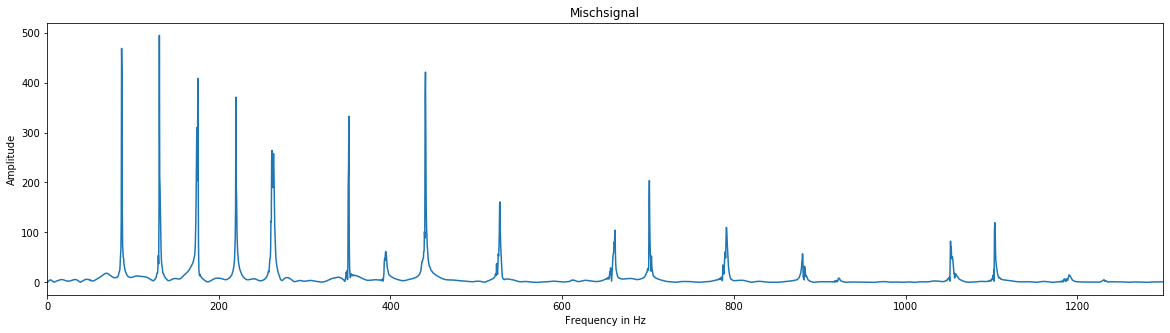

In [26]:
# plot mischsignal
plot_freq_domain(freq, mischsignal, 'Mischsignal')

In [27]:
ampl_const = 200
fourier_list = list(mischsignal)
ampl_peaks = list(filter(lambda i: i > 150, fourier_list))

In [28]:
for x in range(len(ampl_peaks)):
    index = fourier_list.index(ampl_peaks[x])
    print('Frequenz bei Index {0}: {1}Hz mit einer Amplitude von: {2:0.2f}dB'
          .format(index, freq[index], ampl_peaks[x]))

Frequenz bei Index 217: 86.8Hz mit einer Amplitude von: 468.33dB
Frequenz bei Index 218: 87.2Hz mit einer Amplitude von: 421.45dB
Frequenz bei Index 219: 87.6Hz mit einer Amplitude von: 157.90dB
Frequenz bei Index 327: 130.8Hz mit einer Amplitude von: 494.43dB
Frequenz bei Index 328: 131.2Hz mit einer Amplitude von: 214.03dB
Frequenz bei Index 329: 131.6Hz mit einer Amplitude von: 187.38dB
Frequenz bei Index 434: 173.6Hz mit einer Amplitude von: 167.07dB
Frequenz bei Index 435: 174.0Hz mit einer Amplitude von: 243.31dB
Frequenz bei Index 436: 174.4Hz mit einer Amplitude von: 310.00dB
Frequenz bei Index 437: 174.8Hz mit einer Amplitude von: 215.13dB
Frequenz bei Index 438: 175.2Hz mit einer Amplitude von: 203.99dB
Frequenz bei Index 439: 175.6Hz mit einer Amplitude von: 408.23dB
Frequenz bei Index 440: 176.0Hz mit einer Amplitude von: 232.83dB
Frequenz bei Index 549: 219.6Hz mit einer Amplitude von: 156.69dB
Frequenz bei Index 550: 220.0Hz mit einer Amplitude von: 370.75dB
Frequenz bei 

In [29]:
# Build model
m = Model()
 
lamb_40 = m.addVar(lb = 0, vtype = GRB.CONTINUOUS, name = 'lamb_40_E2')
lamb_41 = m.addVar(lb = 0, vtype = GRB.CONTINUOUS, name = 'lamb_41_F2')
lamb_42 = m.addVar(lb = 0, vtype = GRB.CONTINUOUS, name = 'lamb_42_F#2')
lamb_43 = m.addVar(lb = 0, vtype = GRB.CONTINUOUS, name = 'lamb_43_G2')

lamb_45 = m.addVar(lb = 0, vtype = GRB.CONTINUOUS, name = 'lamb_45_A2')
lamb_46 = m.addVar(lb = 0, vtype = GRB.CONTINUOUS, name = 'lamb_46_A#2')
lamb_47 = m.addVar(lb = 0, vtype = GRB.CONTINUOUS, name = 'lamb_47_B2')
lamb_48 = m.addVar(lb = 0, vtype = GRB.CONTINUOUS, name = 'lamb_48_C3')

lamb_50 = m.addVar(lb = 0, vtype = GRB.CONTINUOUS, name = 'lamb_50_D3')
lamb_51 = m.addVar(lb = 0, vtype = GRB.CONTINUOUS, name = 'lamb_51_D#3')
lamb_52 = m.addVar(lb = 0, vtype = GRB.CONTINUOUS, name = 'lamb_52_E3')
lamb_53 = m.addVar(lb = 0, vtype = GRB.CONTINUOUS, name = 'lamb_53_F3')

lamb_55 = m.addVar(lb = 0, vtype = GRB.CONTINUOUS, name = 'lamb_55_G3')
lamb_56 = m.addVar(lb = 0, vtype = GRB.CONTINUOUS, name = 'lamb_56_G#3')
lamb_57 = m.addVar(lb = 0, vtype = GRB.CONTINUOUS, name = 'lamb_57_A3')
lamb_58 = m.addVar(lb = 0, vtype = GRB.CONTINUOUS, name = 'lamb_58_A#3')

lamb_59 = m.addVar(lb = 0, vtype = GRB.CONTINUOUS, name = 'lamb_59_B3')
lamb_60 = m.addVar(lb = 0, vtype = GRB.CONTINUOUS, name = 'lamb_60_C4')
lamb_61 = m.addVar(lb = 0, vtype = GRB.CONTINUOUS, name = 'lamb_61_C#4')
lamb_62 = m.addVar(lb = 0, vtype = GRB.CONTINUOUS, name = 'lamb_62_D4')

lamb_64 = m.addVar(lb = 0, vtype = GRB.CONTINUOUS, name = 'lamb_64_E4')
lamb_65 = m.addVar(lb = 0, vtype = GRB.CONTINUOUS, name = 'lamb_65_F4')
lamb_66 = m.addVar(lb = 0, vtype = GRB.CONTINUOUS, name = 'lamb_66_F#4')
lamb_67 = m.addVar(lb = 0, vtype = GRB.CONTINUOUS, name = 'lamb_67_G4')

In [30]:
#Optimize Signal
deviation = 0
 
for sgn in range(len(mischsignal)):
    approxi_sgn = ( lamb_40*ton_40[sgn] +
                    lamb_41*ton_41[sgn] +
                    lamb_42*ton_42[sgn] +
                    lamb_43*ton_43[sgn] +
                   
                    lamb_45*ton_45[sgn] +
                    lamb_46*ton_46[sgn] +
                    lamb_47*ton_47[sgn] +
                    lamb_48*ton_48[sgn] +
                   
                    lamb_50*ton_50[sgn] +
                    lamb_51*ton_51[sgn] +
                    lamb_52*ton_52[sgn] +
                    lamb_53*ton_53[sgn] +
                   
                    lamb_55*ton_55[sgn] +
                    lamb_56*ton_56[sgn] +
                    lamb_57*ton_57[sgn] +
                    lamb_58*ton_58[sgn] +
                   
                    lamb_59*ton_59[sgn] +
                    lamb_60*ton_60[sgn] +
                    lamb_61*ton_61[sgn] +
                    lamb_62*ton_62[sgn] +
                   
                    lamb_64*ton_64[sgn] +
                    lamb_65*ton_65[sgn] +
                    lamb_66*ton_66[sgn] +
                    lamb_67*ton_67[sgn])
   
    deviation += ((mischsignal[sgn] - approxi_sgn)*(mischsignal[sgn] - approxi_sgn))

m.setObjective(deviation, GRB.MINIMIZE)
m.optimize()
 
for v in m.getVars():
    print('%s: %g' % (v.varName, v.x))

Optimize a model with 0 rows, 24 columns and 0 nonzeros
Model has 300 quadratic objective terms
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [6e+04, 1e+06]
  QObjective range [1e+04, 2e+06]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Presolve time: 0.03s
Presolved: 0 rows, 24 columns, 0 nonzeros
Presolved model has 300 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 23
 AA' NZ     : 2.530e+02
 Factor NZ  : 2.760e+02
 Factor Ops : 4.324e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0  -7.79015947e+09  3.44291516e+06  2.63e+03 6.87e+02  9.79e+05     0s
   1  -6.21972482e+06  1.86010178e+06  2.73e+00 7.14e-01  2.06e+03     0s
   2   1.56475715e+06  1.87856315e+06  1.07e-01 2.79e-02  1.40e+02     0s
   3   1.83882324e+06  1.88064770e+06  1.46e-02 3.83e-03  9.39e+01